In [1]:
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [7]:
def query_data(query):
    """
    Function to query data from the database using sqlalchemy
    :param query: 
    :return: pd.DataFrame
    
    Connection parameters:
    user = readmyzone
    password = (get from environment variable MYSQL_PASSWORD)
    host = 192.168.2.7
    port = 3306
    """
    
    # Create the connection string
    user = 'readmyzone'
    password = os.environ.get('MYSQL_PASSWORD')
    host = '192.168.2.7'
    port = '3306'
    db = 'myzone'
    connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{db}'
    
    # Create the engine
    engine = create_engine(connection_string)
    
    try:
        # Query the data
        data = pd.read_sql(query, engine)
    except Exception as e:
        print(e)
        data = None
    
    return data

# Load the data

In [8]:
sav_incidencias = query_data('SELECT * FROM sav_incidencias')
sav_piezas = query_data('SELECT * FROM sav_piezas')
sav_estados = query_data('SELECT * FROM sav_estados')
sav_incidencias_tipo = query_data('SELECT * FROM sav_incidencias_tipo')

In [9]:
dataset = sav_incidencias.merge(sav_piezas, left_on='codigo', right_on='codigo_incidencia', how='left', suffixes=(None, '_pieza'))
dataset = dataset.merge(sav_estados, left_on='estado', right_on='id', how='left', suffixes=(None, '_estado'))
dataset = dataset.merge(sav_incidencias_tipo, left_on='tipo', right_on='id', how='left', suffixes=(None, '_tipo'))

In [10]:
clean_dataset = dataset[(dataset["tipo"] == 1) & (dataset["estado"].isin([2,6]))]

In [11]:
dataset_incidencias = sav_incidencias.merge(sav_estados, left_on='estado', right_on='id', how='left', suffixes=(None, '_estado'))
dataset_incidencias = dataset_incidencias.merge(sav_incidencias_tipo, left_on='tipo', right_on='id', how='left', suffixes=(None, '_tipo'))

# EDA

In [12]:
dataset.head(50)

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,titulo_en,titulo_fr,titulo_it,titulo_pt,id_tipo,titulo_es_tipo,titulo_en_tipo,titulo_fr_tipo,titulo_it_tipo,titulo_pt_tipo
0,47,1,AZYZAJEUE0,2015-04-21 11:28:47,2015-04-29 13:35:50,67,118.0,5000333,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
1,49,1,YZ2YZZUU16,2015-04-27 09:32:18,2015-05-28 06:55:45,498,128.0,CENTRAL ALARMAS,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
2,5,1,Y52FA5OT97,2015-03-10 17:49:28,2015-04-16 16:51:24,26,67.0,21406866,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
3,6,1,YPQXAZIYD6,2015-03-10 18:34:05,2015-04-16 16:47:08,26,67.0,Termostato tacto Jose,0,0,...,Closed,Fermée,Chiusa,None,3.0,reparacion,repair,reparation,riparazione,None
4,50,1,ZP2CZZYVBD,2015-04-27 09:51:49,2015-06-03 09:09:08,499,117.0,SPLITMANIA JEREZ-ANTONIO GARCIA PADILLA,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
5,63,1,ZJAFAPUT58,2015-05-12 15:35:37,2015-05-13 16:29:22,497,135.0,11503687,0,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
6,46,1,YPUEA5WZ10,2015-04-20 14:44:57,2015-05-28 06:21:09,498,128.0,REPARACION MODULO PERSIANA,1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None
7,89,1,YJECZZEZ33,2015-05-25 09:35:22,2015-06-15 09:24:58,499,117.0,PDH150042_DEVOLUCION,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
8,89,1,YJECZZEZ33,2015-05-25 09:35:22,2015-06-15 09:24:58,499,117.0,PDH150042_DEVOLUCION,1,0,...,Closed,Fermée,Chiusa,None,2.0,devolucion,return,retour,ritorno,None
9,51,1,ZPWBA5ETF7,2015-04-27 14:49:58,2015-05-13 16:33:58,497,135.0,"REJILLA DE JESUS VELASCO, SPLITMANIA HUELVA",1,0,...,Closed,Fermée,Chiusa,None,1.0,garantia,guarantee,garantie,garanzia,None


In [13]:
groupby = dataset.groupby(["titulo_es_tipo","titulo_es"]).size().rename('count').reset_index()
groupby["%"] = groupby["count"] / groupby["count"].sum() * 100
groupby

,titulo_es_tipo,titulo_es,count,%
0,devolucion,Abierta,220,0.244170
1,devolucion,Anulada,4479,4.971088
2,devolucion,Cerrada,27986,31.060699
3,devolucion,R.Tramitada,1125,1.248599
4,devolucion,R.Validada,556,0.617085
5,devolucion,Validada,126,0.139843
6,garantia,Abierta,61,0.067702
7,garantia,Anulada,2065,2.291872
8,garantia,Cerrada,42803,47.505577
9,garantia,R.Tramitada,1872,2.077668


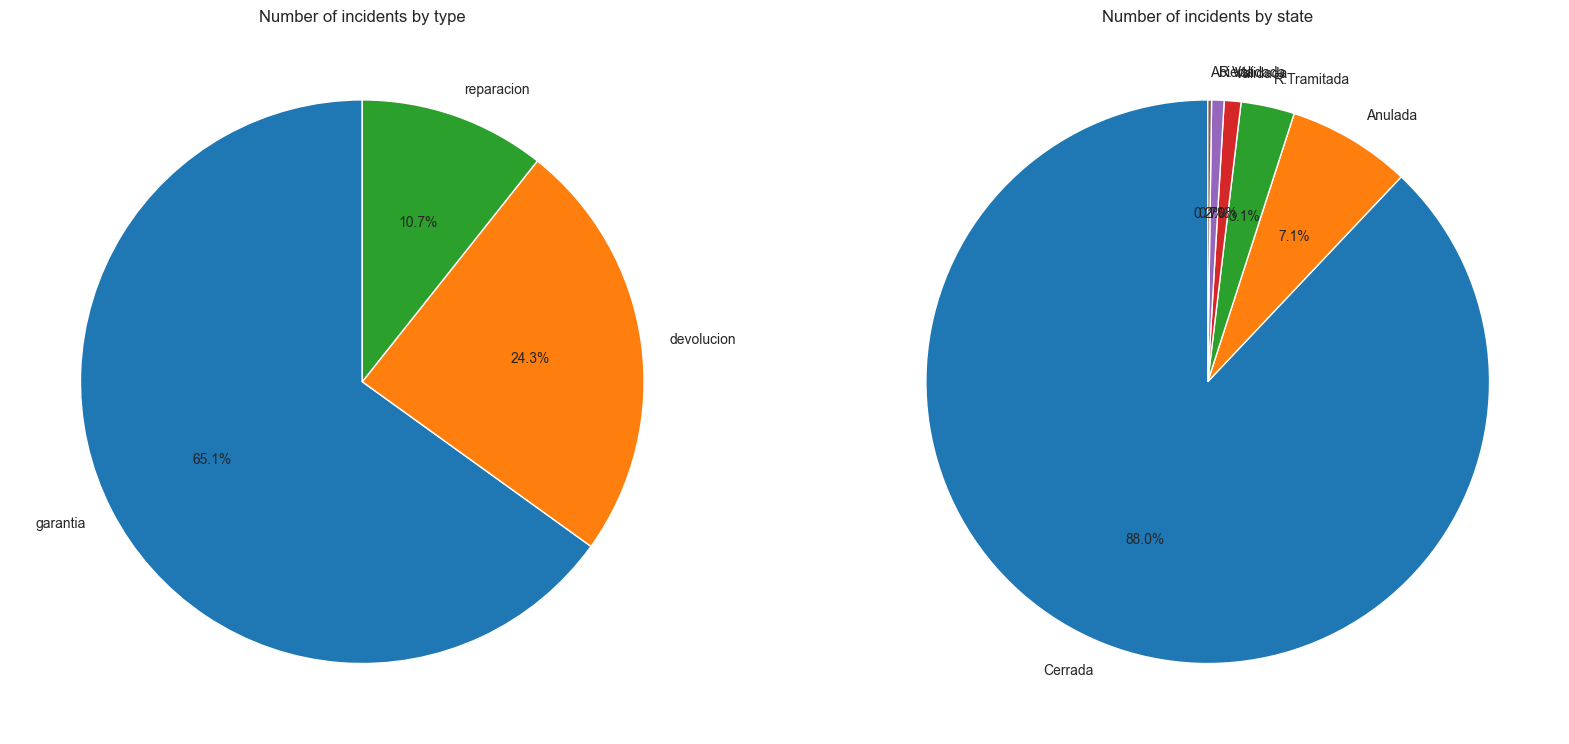

In [14]:
group_inc_tipo = dataset_incidencias.groupby("titulo_es_tipo").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)
group_inc_estado = dataset_incidencias.groupby("titulo_es").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)

# Create a subplot and plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].pie(group_inc_tipo["count"], labels=group_inc_tipo.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Number of incidents by type")
axs[1].pie(group_inc_estado["count"], labels=group_inc_estado.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Number of incidents by state")
plt.show()

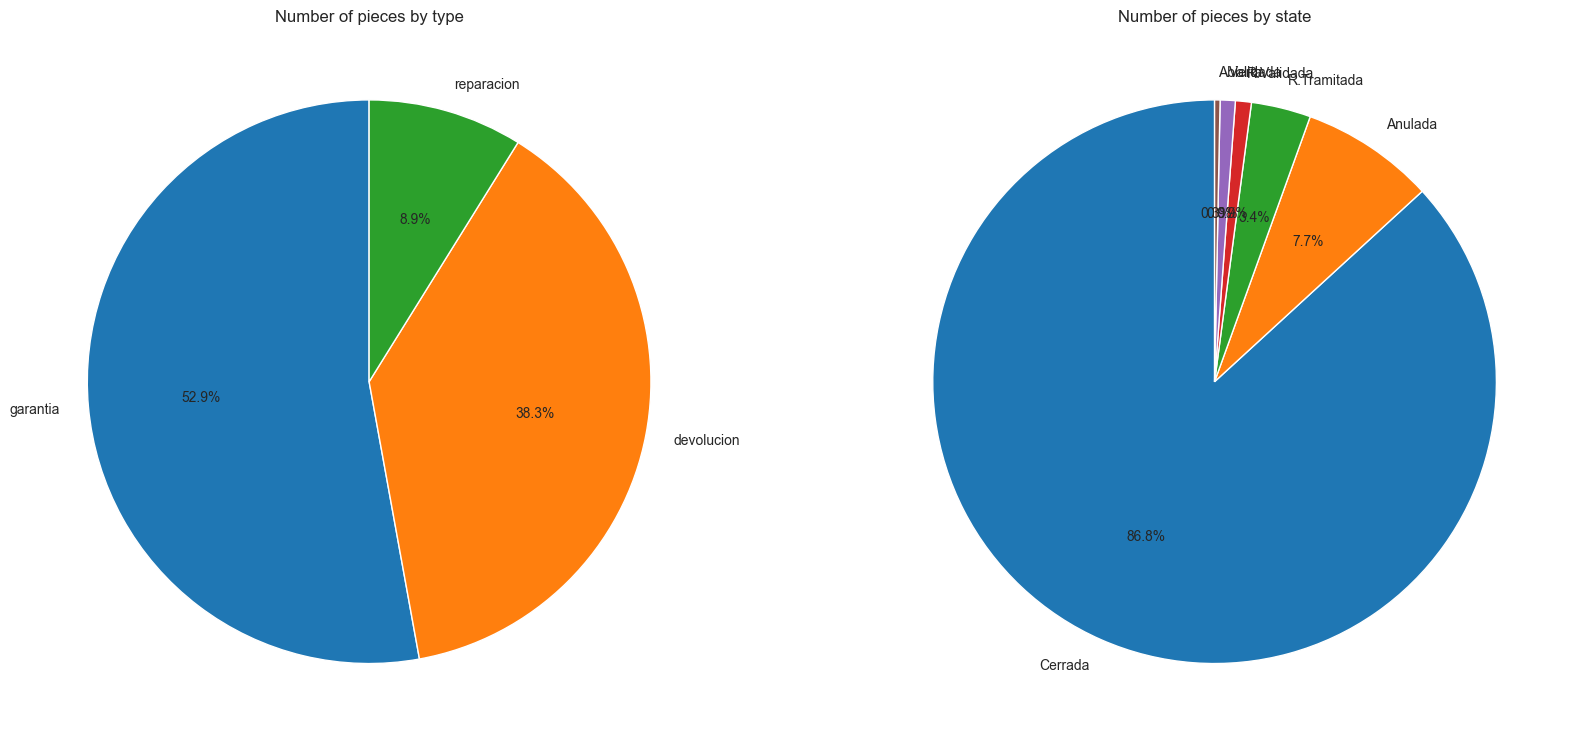

In [15]:
group_pieces_tipo = dataset.groupby("titulo_es_tipo").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)
group_pieces_estado = dataset.groupby("titulo_es").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False)

# Create a subplot and plot both graphs in the same figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].pie(group_pieces_tipo["count"], labels=group_pieces_tipo.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Number of pieces by type")
axs[1].pie(group_pieces_estado["count"], labels=group_pieces_estado.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Number of pieces by state")
plt.show()

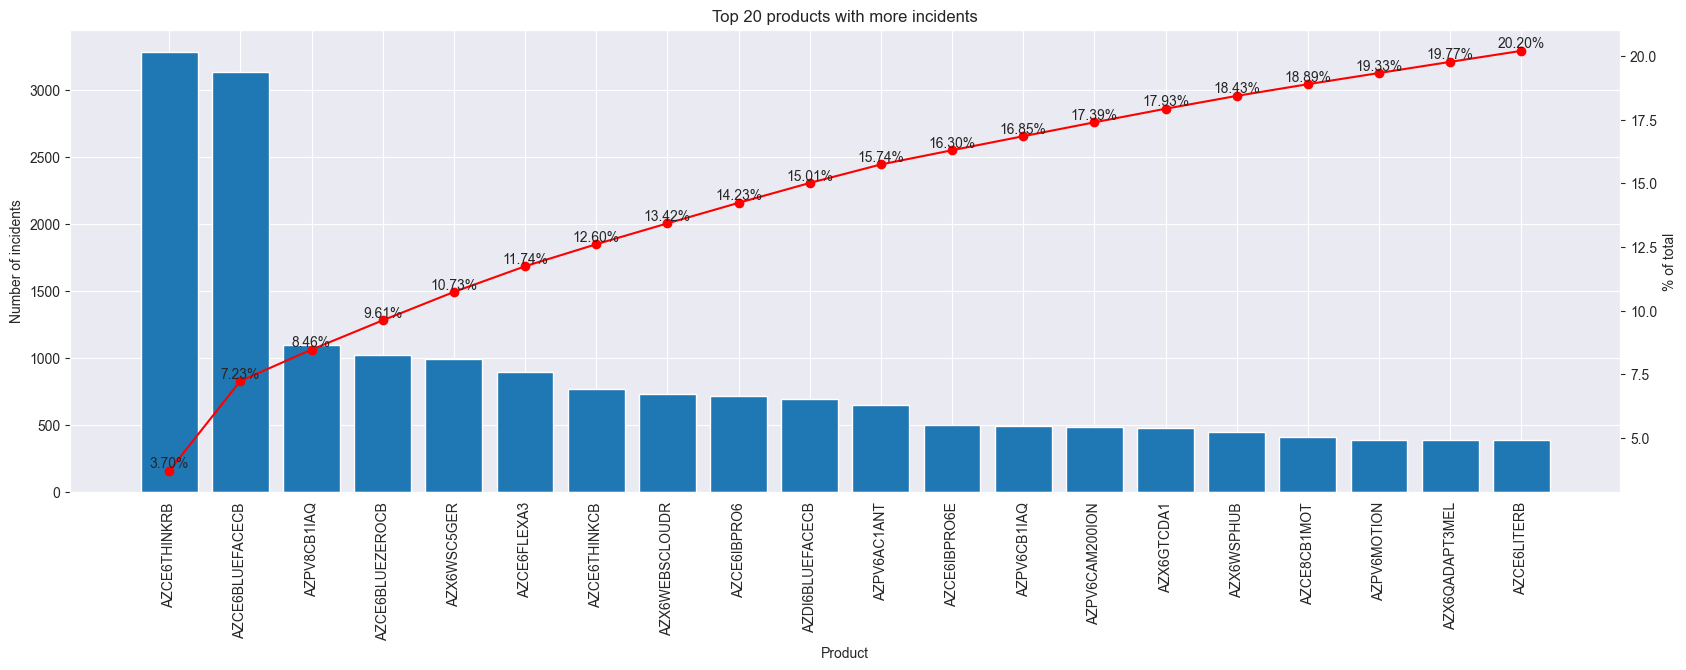

In [17]:
# Plot the X products with more incidents
X = 20
group_articulo = clean_dataset.groupby("cod_articulo").size().to_frame().rename(columns={0: "count"}).sort_values("count", ascending=False).head(X)
group_articulo["cumsum"] = group_articulo["count"].cumsum()
group_articulo["%"] = group_articulo["cumsum"] / dataset.groupby("cod_articulo").size().sum() * 100

# Plot the number of incidents
plt.figure(figsize=(20, 6))
plt.bar(group_articulo.index, group_articulo["count"], zorder=2)
plt.ylabel("Number of incidents")
plt.xlabel("Product")
plt.grid(zorder=0)
plt.xticks(rotation=90)

# Plot the % of total
plt.twinx()
plt.plot(group_articulo.index, group_articulo["%"], color='red', marker='o', zorder=3)
for i in range(X):
    plt.text(group_articulo.index[i], group_articulo["%"].iloc[i], f"{group_articulo['%'].iloc[i]:.2f}%", ha='center', va='bottom')
plt.title(f"Top {X} products with more incidents")
plt.grid(False)
plt.ylabel("% of total")
plt.show()

# Data preprocessing (Translating the text fields)

In [18]:
from deep_translator import GoogleTranslator
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [19]:
fields_to_translate = ["desc_problema", "problema", "descripcion"]
text_to_translate = {}

# text_to_translate = clean_dataset[fields_to_translate]
for field in fields_to_translate:
    text_to_translate[field] = pd.DataFrame(clean_dataset[field].unique(), columns=[field])

In [16]:
# Detect language of the texts
def detect_language(text):
    if len(str(text)) < 5:
        return "Too short"
    
    try:
        return 'es' if str(text) == '' else detect(str(text).lower())
    except Exception as e:
        return "Error"

for field in fields_to_translate:
    text_to_translate[field][f"{field}_lg"] = text_to_translate[field][field].apply(detect_language)

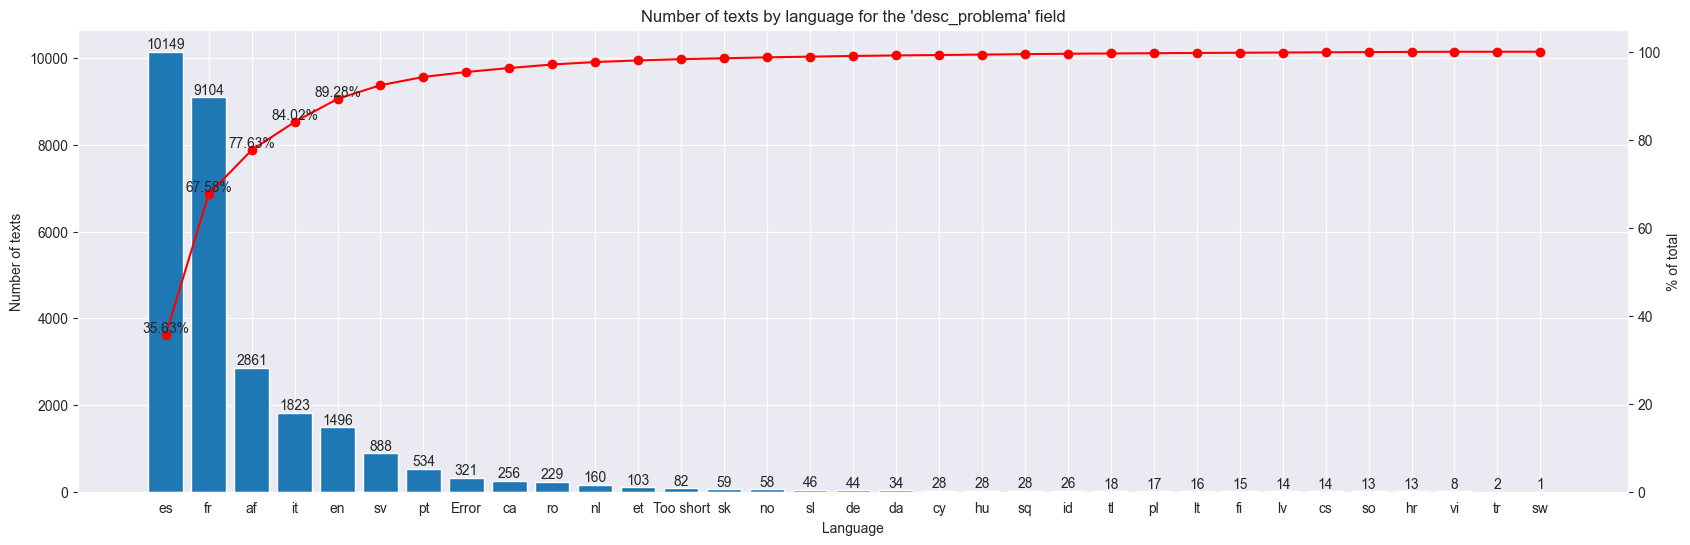

In [25]:
# Plot the number of texts by language
lang = text_to_translate["desc_problema"]["desc_problema_lg"].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(lang.index, lang.values, zorder=2)
for i in range(len(lang)):
    plt.text(lang.index[i], lang.values[i], lang.values[i], ha='center', va='bottom', zorder=2)
plt.ylabel("Number of texts")
plt.xlabel("Language")
plt.title("Number of texts by language for the 'desc_problema' field")
plt.grid(zorder=0)
plt.twinx()
plt.plot(lang.index, lang.cumsum() / lang.sum() * 100, color='red', marker='o', zorder=2)
plt.grid(False)
for i in range(5):
    plt.text(lang.index[i], lang.cumsum().iloc[i] / lang.sum() * 100, f"{lang.cumsum().iloc[i] / lang.sum() * 100:.2f}%", ha='center', va='bottom', zorder=2)
plt.ylabel("% of total")
plt.ylim(0, 105)
plt.show()

In [45]:
aux = 0
for text in text_to_translate.keys():
    print(f"Lenght of filtered dataframe: {len(text_to_translate[text][~text_to_translate[text][f'{text}_lg'].isin(['es','Error','Too short'])])}")
    aux += text_to_translate[text][~text_to_translate[text][f'{text}_lg'].isin(['es','Error','Too short'])][text].apply(lambda x: len(str(x))).sum()
print(f"Total number of characters to translate: {aux}")

Lenght of filtered dataframe: 17936
Lenght of filtered dataframe: 19530
Lenght of filtered dataframe: 9853
Total number of characters to translate: 2145996


In [68]:
# Save in disk the text to translate dictionary to avoid reprocessing
for text in text_to_translate.keys():
    text_to_translate[text].to_csv(f"../DATA/{text}.csv", sep='¬', encoding='utf-8-sig', index=False)

In [20]:
# Load from disk the text to translate dictionary
text_to_translate = {}
for text in fields_to_translate:
    text_to_translate[text] = pd.read_csv(f"../DATA/{text}.csv", sep='¬', encoding='utf-8-sig')

C:\Users\voliveira\AppData\Local\Temp\ipykernel_21052\800894653.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  text_to_translate[text] = pd.read_csv(f"{text}.csv", sep='¬', encoding='utf-8-sig')
C:\Users\voliveira\AppData\Local\Temp\ipykernel_21052\800894653.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  text_to_translate[text] = pd.read_csv(f"{text}.csv", sep='¬', encoding='utf-8-sig')
C:\Users\voliveira\AppData\Local\Temp\ipykernel_21052\800894653.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this 

In [92]:
from tqdm import tqdm

def translate_in_batches(df, columns_to_translate, batch_size=10):
    """
    Function to translate the text in batches.
    It uses the Google Translator API to translate the text.
    It writes the translated text to a csv file.
    :param df: dataframe with the text to translate
    :param columns_to_translate: columns to translate
    :param batch_size: size of the batch to translate
    :return: None
    """
    for column in columns_to_translate:
        total_rows = len(df)
        with tqdm(total=total_rows) as pbar:
            for i in range(0, total_rows, batch_size):
                batch = df.iloc[i:i+batch_size][column].tolist()
                try:
                    translations = GoogleTranslator(source='auto', target='es').translate_batch(batch)
                    # Test if csv file exists, if not created it and add the translated text to it
                    if not os.path.exists(f'{column}_trasnlated.csv'):
                        pd.DataFrame({
                            column: batch,
                            f'{column}_translated': translations
                        }).to_csv(f'../DATA/{column}_translated.csv', mode='a', index=False, sep='¬', encoding='utf-8-sig', lineterminator='\n')
                    else:
                        pd.DataFrame({
                            column: batch,
                            f'{column}_translated': translations
                        }).to_csv(f'../DATA/{column}_translated.csv', mode='a', header=False, index=False, sep='¬', encoding='utf-8-sig', lineterminator='\n')
                    pbar.update(len(batch))
                except Exception as e:
                    print(f"Error occurred during translation: {e}")


In [74]:
# Translate texts that are not spanish text
for text in text_to_translate.keys():
    translate_in_batches(text_to_translate[text][~text_to_translate[text][f'{text}_lg'].isin(['es','Error','Too short'])], [text])

  0%|          | 0/17936 [00:02<?, ?it/s]


KeyboardInterrupt: 

### The analysis will continue in the notebook MyZone-DefectClassification